# 선형회귀
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [3]:
### 데이터 준비

In [4]:
num = 51

x = np.linspace(0, 10, 51)
y = x + np.random.normal(1, 2, num) # 1 = 평균, 2 = 표준편차, 51 = 개수

In [5]:
y

array([ 1.40744334,  0.17278773,  1.27174473,  0.79725814, -1.63475553,
        4.97126013,  3.19861633,  6.08738981,  5.76182276,  1.1129467 ,
        2.53242368,  3.75679661,  6.16828874, -1.71644325,  5.04761324,
        4.4207111 ,  6.27699183,  1.42447973,  7.07089537,  4.15875827,
        6.2450082 ,  2.71032572,  6.89177308,  6.22742654,  5.95432812,
        6.23638734,  5.92814436,  9.28873923,  5.24155325,  9.87657439,
       10.45847999,  7.87845167,  8.87581207,  4.88674725,  8.71757001,
        9.98831586, 13.06436031,  8.65516566,  9.31131166,  8.53217391,
       12.66439239, 10.85385057,  9.40507062,  8.74644135,  9.37645303,
        8.81845418,  9.42693902, 15.10355019,  9.71707678,  9.66898776,
       12.09921493])

<AxesSubplot: >

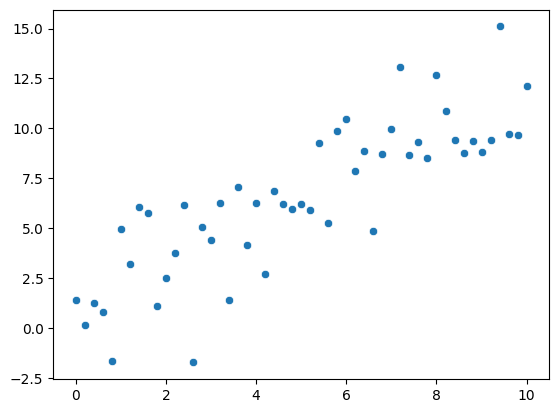

In [6]:
sns.scatterplot(x=x, y=y)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022)
print(x_train.shape)

(40,)


In [8]:
x_train[:10]

array([2. , 0.8, 5. , 0. , 6.8, 7.2, 2.6, 2.4, 9.2, 4.4])

In [9]:
x_train = x_train.reshape(-1,1)

In [10]:
x_train[:10]

array([[2. ],
       [0.8],
       [5. ],
       [0. ],
       [6.8],
       [7.2],
       [2.6],
       [2.4],
       [9.2],
       [4.4]])

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train) # x_train을 2차원으로 바꿔주어야함

LinearRegression()

In [12]:
lr.score(x_train, y_train)

0.6701880446514801

In [13]:
lr.coef_, lr.intercept_ # 기울기, 절편

(array([1.13166085]), 0.9063586677364484)

In [14]:
y_pred = lr.predict(x_train)

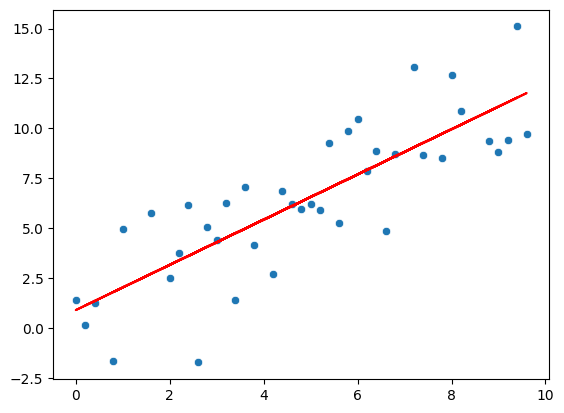

In [15]:
sns.scatterplot(x=x_train.reshape(-1),y=y_train) # x_train.reshape(-1)은 1차원으로 다시 펴겠다는 뜻
plt.plot(x_train.reshape(-1),y_pred, 'r')
plt.show()

### 평가

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # mse 오차의 제곱의 평균

# MSE
mse = mean_squared_error(y_train, y_pred)
mse

4.725988079512651

In [17]:
# RMSE root MSE

rmse = np.sqrt(mse)
rmse # 작을수록 좋다, 값 자체가 에러이기 때문.

2.17393377992814

In [18]:
# MAE
mean_absolute_error(y_train, y_pred)

1.733219030073372

In [19]:
### 테스트

In [20]:
x_test = x_test.reshape(-1,1)

In [21]:
y_pred = lr.predict(x_test)

In [22]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.1547654283075386

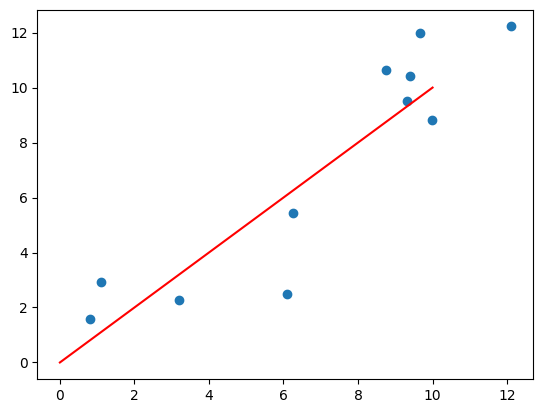

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([0,10], [0,10], 'r')

In [24]:
y_test

array([12.09921493,  9.31131166,  8.74644135,  0.79725814,  1.1129467 ,
        3.19861633,  9.98831586,  9.40507062,  6.08738981,  9.66898776,
        6.2450082 ])

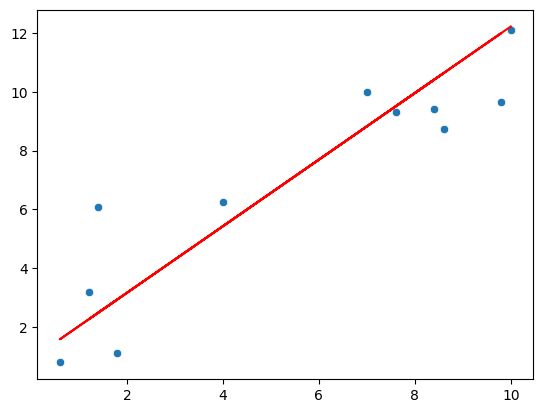

In [25]:
sns.scatterplot(x=x_test.reshape(-1),y=y_test) # x_train.reshape(-1)은 1차원으로 다시 펴겠다는 뜻
plt.plot(x_test.reshape(-1),y_pred, 'r')
plt.show()